原文：https://huggingface.co/blog/stable_diffusion

安装 diffusers
安装 scipy、ftfy、transformers和accelerate(用于实现更快的加载)

In [1]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate
!pip install -U peft transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 91.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.3
    Uninstalling transformers-4.42.3:
      Successfully uninstalled transformers-4.42.3


加载模型

生成图像（每次运行时都会给你一个不同的图像）

In [2]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-07-30 20:58:50.223675: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 20:58:50.223830: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 20:58:50.360063: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (128 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', open mouth, red eyes, ribbon, short dress, short sleeves, simple background, skin fang, smile, solo, standing, streaked hair, tail, two - tone hair, umamusume, white background, white dress, white hair']


  0%|          | 0/50 [00:00<?, ?it/s]

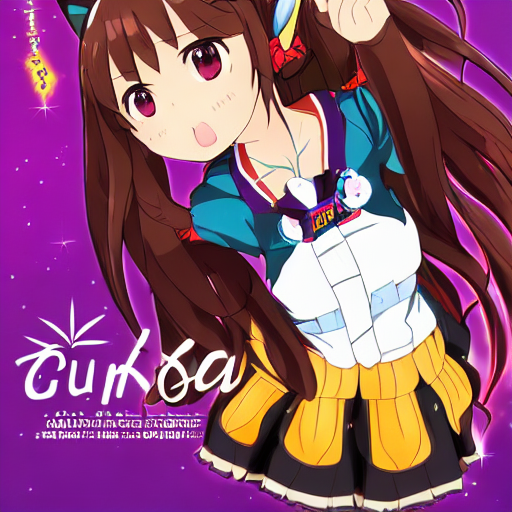

In [3]:
pipe = pipe.to("cuda")

prompt = "1girl, :d, ahoge, animal ears, belt, breasts, brown hair, copano rickey (umamusume), double bun, dress, fang, hair bun, hair ribbon, holding, holding flyer, horse ears, horse girl, horse tail, kannko bokujou, large breasts, leaning forward, long hair, multicolored hair, open mouth, red eyes, ribbon, short dress, short sleeves, simple background, skin fang, smile, solo, standing, streaked hair, tail, two-tone hair, umamusume, white background, white dress, white hair"
n_propmt = "(worst quality:2), (low quality:2), (normal quality:2), lowres, ((monochrome)), ((grayscale)), bad anatomy,DeepNegative, skin spots, acnes, skin blemishes,(fat:1.2),facing away, looking away,tilted head, lowres,bad anatomy,bad hands, missing fingers,extra digit, fewer digits,bad feet,poorly drawn hands,poorly drawn face,mutation,deformed,extra fingers,extra limbs,extra arms,extra legs,malformed limbs,fused fingers,too many fingers,long neck,cross-eyed,mutated hands,polar lowres,bad body,bad proportions,gross proportions,missing arms,missing legs,extra digit, extra arms, extra leg, extra foot,teethcroppe,signature, watermark, username,blurry,cropped,jpeg artifacts,text,error,"
image = pipe(prompt=prompt, negative_prompt=n_propmt).images[0]

image

In [4]:
import peft
import transformers

print("PEFT version:", peft.__version__)
print("Transformers version:", transformers.__version__)


PEFT version: 0.12.0
Transformers version: 4.43.3


In [5]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
pipeline.load_lora_weights("/kaggle/input/fine-tune-lora-zip/fine-tune-lora", weight_name="pytorch_lora_weights.safetensors")


/opt/conda/lib/python3.10/site-packages/diffusers/models/vq_model.py:20: FutureWarning: `VQEncoderOutput` is deprecated and will be removed in version 0.31. Importing `VQEncoderOutput` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQEncoderOutput`, instead.
  deprecate("VQEncoderOutput", "0.31", deprecation_message)
/opt/conda/lib/python3.10/site-packages/diffusers/models/vq_model.py:25: FutureWarning: `VQModel` is deprecated and will be removed in version 0.31. Importing `VQModel` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQModel`, instead.
  deprecate("VQModel", "0.31", deprecation_message)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (128 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', open mouth, red eyes, ribbon, short dress, short sleeves, simple background, skin fang, smile, solo, standing, streaked hair, tail, two - tone hair, umamusume, white background, white dress, white hair']


  0%|          | 0/50 [00:00<?, ?it/s]

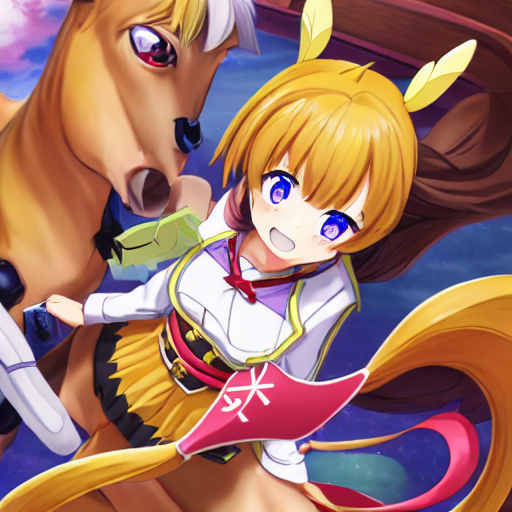

In [6]:

prompt = "1girl, :d, ahoge, animal ears, belt, breasts, brown hair, copano rickey (umamusume), double bun, dress, fang, hair bun, hair ribbon, holding, holding flyer, horse ears, horse girl, horse tail, kannko bokujou, large breasts, leaning forward, long hair, multicolored hair, open mouth, red eyes, ribbon, short dress, short sleeves, simple background, skin fang, smile, solo, standing, streaked hair, tail, two-tone hair, umamusume, white background, white dress, white hair"
n_propmt = "(worst quality:2), (low quality:2), (normal quality:2), lowres, ((monochrome)), ((grayscale)), bad anatomy,DeepNegative, skin spots, acnes, skin blemishes,(fat:1.2),facing away, looking away,tilted head, lowres,bad anatomy,bad hands, missing fingers,extra digit, fewer digits,bad feet,poorly drawn hands,poorly drawn face,mutation,deformed,extra fingers,extra limbs,extra arms,extra legs,malformed limbs,fused fingers,too many fingers,long neck,cross-eyed,mutated hands,polar lowres,bad body,bad proportions,gross proportions,missing arms,missing legs,extra digit, extra arms, extra leg, extra foot,teethcroppe,signature, watermark, username,blurry,cropped,jpeg artifacts,text,error,"
image = pipeline(prompt=prompt, negative_prompt=n_propmt).images[0]

image

如果在某个时候您得到黑色图像，可能是因为模型内部内置的内容过滤器可能检测到 NSFW 结果（"NSFW" 是 "Not Safe For Work" 的缩写，意思是不适合在工作场所观看的内容。在互联网上，通常用于标识那些包含裸露、色情、暴力等内容的图片、视频或者网站。），检测是否包含NSFW 的信息

In [7]:
from diffusers import AutoPipelineForText2Image
import torch
import os

prompts = [
    "katou megumi, 1girl, solo, bangs, brown hair, hat, white headwear, dress, white background, looking at viewer, simple background, brown eyes, open mouth, short hair, ribbon, jacket, red jacket, black ribbon, blush, open clothes, smile, beret, salute, open jacket, arm behind back, collarbone, neck ribbon, long sleeves, :d, upper body, <lora:Misaki Kurehito_XL:0.8>",
    "1girl, purple eyes, blush, long hair, twintails,  solo focus, brown hair, bow, bangs, hair between eyes, blue bow, nose blush,  light blush, :o, fang,  very long hair,  breasts,  blonde hair,  fangs,  outdoor, night, street, starry sky, bench, sitting., hooded jacket, casual,dark night ,night sky, arm hug, open jacket, pleated skirt",
    "masterpiece, best quality, detailed, 1girl, close up,curtained hair, blue eyes, brooch, laces, frilled sleeves, dress, village, bokeh, arms behind back,pastel colorstheme,",
    "masterpiece,best quality,StyleD01,1girl, solo, purple eyes, dress, short sleeves, green hair, pantyhose, twintails, hair ornament, long hair, hair flower, looking at viewer, flower, sitting, blush, ribbon, puffy sleeves, bangs, couch, indoors, purple dress, puffy short sleeves, closed mouth, frills, hair ribbon, white pantyhose, wrist cuffs, black ribbon, frilled dress, hair between eyes, window, on couch, breasts, hair intakes, feet out of frame, neck ribbon, choker, bow",
    "masterpiece,best quality,StyleD01,1girl, solo, thighhighs, long hair, flower, boots, breasts, hair ornament, looking at viewer, detached sleeves, hair flower, blush, torn clothes, white thighhighs, brown footwear, dress, cleavage, purple eyes, bangs, kneeling, hair between eyes, red flower, frills, all fours, petals, plant, medium breasts, white flower, closed mouth, bare shoulders, long sleeves, animal ears, outdoors, knee boots",
]

base_dir = "/kaggle/input/fine-tune-lora-zip/fine-tune-lora"
output_base_dir = "/kaggle/working/"
end_output_dir = "/kaggle/working/output_file_checkpoint-10000000"

os.makedirs(end_output_dir, exist_ok=True)

pipeline = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5",
                                                     torch_dtype=torch.float16).to("cuda")
pipeline.load_lora_weights(base_dir, weight_name="pytorch_lora_weights.safetensors")

for i, prompt in enumerate(prompts):
    output_file = os.path.join(end_output_dir, f"cartoon_{i + 1}.png")
    if not os.path.exists(output_file):
        print(f"Generating image for prompt {i + 1}")
        image = pipeline(prompt=prompt, negative_prompt=n_propmt).images[0]
        image.save(output_file)
    else:
        print(f"Image for prompt {i + 1} already exists, skipping.")

checkpoints = [f for f in os.listdir(base_dir)
               if os.path.isdir(os.path.join(base_dir, f)) and f.startswith('checkpoint')]

for checkpoint in checkpoints:
    checkpoint_path = os.path.join(base_dir, checkpoint)
    output_dir = os.path.join(output_base_dir, f"output_file_{checkpoint}")

    os.makedirs(output_dir, exist_ok=True)

    print(f"Processing checkpoint: {checkpoint}")
    pipeline = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5",
                                                         torch_dtype=torch.float16).to("cuda")
    pipeline.load_lora_weights(checkpoint_path, weight_name="pytorch_lora_weights.safetensors")

    for i, prompt in enumerate(prompts):
        output_file = os.path.join(output_dir, f"cartoon_{i + 1}.png")
        if not os.path.exists(output_file):
            print(f"Generating image for prompt {i + 1} using checkpoint {checkpoint}")
            image = pipeline(prompt=prompt, negative_prompt=n_propmt).images[0]
            image.save(output_file)
        else:
            print(f"Image for prompt {i + 1} using checkpoint {checkpoint} already exists, skipping.")

print("All images generated and saved.")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-3500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-3500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-1500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-1500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-2000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-2000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-9500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-9500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-11000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-11000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-8500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-8500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-13000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-13000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-10000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-10000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-9000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-9000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-12000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-12000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-14000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-14000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-15000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-15000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-13500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-13500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-5500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-5500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-3000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-3000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-11500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-11500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-12500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-12500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-5000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-5000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-7000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-7000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-8000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-8000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-2500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-2500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-6000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-6000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-4500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-4500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-4000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-4000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-7500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-7500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-1000


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-1000


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-14500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-14500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-10500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-10500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-6500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-6500


  0%|          | 0/50 [00:00<?, ?it/s]

All images generated and saved.


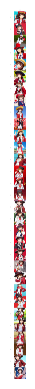

In [8]:
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import re  # Import regex for pattern matching

def merge_images_horizontally(images):
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)

    new_image = Image.new('RGB', (total_width, max_height))
    x_offset = 0
    for img in images:
        new_image.paste(img, (x_offset, 0))
        x_offset += img.width
    return new_image

def merge_images_vertically(images):
    widths, heights = zip(*(i.size for i in images))
    max_width = max(widths)
    total_height = sum(heights)

    new_image = Image.new('RGB', (max_width, total_height))
    y_offset = 0
    for img in images:
        new_image.paste(img, (0, y_offset))
        y_offset += img.height
    return new_image

def add_labels(image, x_labels, y_labels, label_width=150, label_height=100, font_size=30):
    img_with_labels = Image.new('RGB', (image.width + label_width, image.height + label_height), (255, 255, 255))
    img_with_labels.paste(image, (label_width, label_height))

    draw = ImageDraw.Draw(img_with_labels)

    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except IOError:
        font = ImageFont.load_default()

    x_label_width = image.width // len(x_labels)
    for i, label in enumerate(x_labels):
        bbox = draw.textbbox((0, 0), label, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        x_position = label_width + (i * x_label_width) + (x_label_width - text_width) // 2
        y_position = label_height // 2 - text_height // 2
        draw.text((x_position, y_position), label, fill="black", font=font)

    y_label_height = image.height // len(y_labels)
    for i, label in enumerate(y_labels):
        bbox = draw.textbbox((0, 0), label, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        x_position = 10
        y_position = label_height + (i * y_label_height) + (y_label_height - text_height) // 2
        draw.text((x_position, y_position), label, fill="black", font=font)

    return img_with_labels

def main(input_folder, output_file):
    subfolders = [f.path for f in os.scandir(input_folder) if f.is_dir()]

    # 过滤出以数字结尾的目录
    subfolders = [folder for folder in subfolders if re.search(r'-\d+$', os.path.basename(folder))]

    # 对子文件夹进行排序
    subfolders.sort(key=lambda folder: int(re.search(r'-\d+$', os.path.basename(folder)).group()[1:]))

    combined_images = []
    x_labels = []  # 横坐标标签
    y_labels = []  # 纵坐标标签

    for folder in subfolders:
        images = []
        files = sorted([f for f in os.listdir(folder) if f.endswith('.png')])
        x_labels = [f for f in files]  # 更新横坐标标签

        for file in files:
            img_path = os.path.join(folder, file)
            img = Image.open(img_path)
            images.append(img)

        combined_img = merge_images_horizontally(images)
        combined_images.append(combined_img)

    # 更新纵坐标标签
    y_labels = [os.path.basename(folder).replace('output_file_checkpoint-', '') for folder in subfolders]

    final_image = merge_images_vertically(combined_images)

    # 添加坐标标签
    final_image_with_labels = add_labels(final_image, x_labels, y_labels, label_width=150, label_height=100, font_size=30)

    final_image_with_labels.save(output_file)

# 使用示例
input_folder = '/kaggle/working'
output_file = '/kaggle/working/final_combined_image_with_labels.png'
main(input_folder, output_file)

# 可选：显示结果
img = Image.open(output_file)
plt.imshow(img)
plt.axis('off')
plt.show()


如果想要确定性输出，可以播种随机种子并将生成器传递到管道。每次使用具有相同种子的生成器时，就会得到相同的图像输出。